In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [84]:
bnb_data = pd.read_csv('BNB.csv')
bnb_data.head()

,unix,date,symbol,open,high,low,close,Volume BNB,Volume USDT,tradecount
0,1610496000000,2021-01-13 00:00:00,BNB/USDT,38.2703,38.3218,37.8551,37.8827,12081.632,4.603452e+05,1639
1,1610409600000,2021-01-12 00:00:00,BNB/USDT,38.1623,40.1989,37.0000,38.2541,3261261.810,1.258979e+08,342953
2,1610323200000,2021-01-11 00:00:00,BNB/USDT,42.4033,42.5094,35.0374,38.1674,6332801.055,2.430173e+08,664128
3,1610236800000,2021-01-10 00:00:00,BNB/USDT,43.8479,45.1620,40.0000,42.4031,4277406.290,1.851653e+08,431771
4,1610150400000,2021-01-09 00:00:00,BNB/USDT,42.3450,44.0552,41.5000,43.8479,2720363.636,1.162905e+08,294683


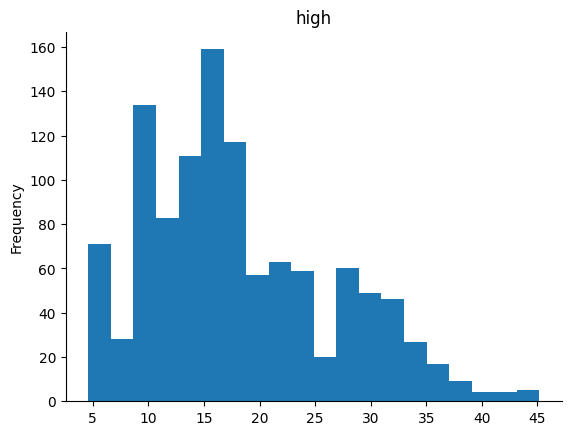

In [83]:
# @title high

from matplotlib import pyplot as plt
bnb_data['high'].plot(kind='hist', bins=20, title='high')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [80]:
# Load and prepare data
data = pd.read_csv('BNB.csv')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

In [92]:
# Select the column to plot
column_name = 'tradecount'

In [51]:
bnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1123 entries, 0 to 1122
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unix         1123 non-null   int64  
 1   date         1123 non-null   object 
 2   symbol       1123 non-null   object 
 3   open         1123 non-null   float64
 4   high         1123 non-null   float64
 5   low          1123 non-null   float64
 6   close        1123 non-null   float64
 7   Volume BNB   1123 non-null   float64
 8   Volume USDT  1123 non-null   float64
 9   tradecount   1123 non-null   int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 87.9+ KB


In [52]:
bnb_data.describe()

,unix,open,high,low,close,Volume BNB,Volume USDT,tradecount
count,1.123000e+03,1123.000000,1123.000000,1123.000000,1123.000000,1.123000e+03,1.123000e+03,1123.000000
mean,1.562026e+12,17.624451,18.234606,16.910852,17.654442,2.431909e+06,4.511717e+07,95442.957257
std,2.802181e+10,8.133304,8.362087,7.874201,8.147827,1.423883e+06,3.742430e+07,86763.305077
min,1.513555e+12,4.291200,4.599000,3.250000,4.291200,1.208163e+04,4.603452e+05,1639.000000
25%,1.537790e+12,11.422450,11.858100,10.730000,11.436400,1.383452e+06,1.897160e+07,41216.500000
50%,1.562026e+12,15.961100,16.430500,15.400000,15.977500,2.194260e+06,3.629533e+07,67405.000000
75%,1.586261e+12,22.464850,23.277500,21.600650,22.516150,3.080809e+06,5.846762e+07,124345.500000
max,1.610496e+12,43.847900,45.162000,41.500000,43.847900,1.166195e+07,3.241622e+08,664128.000000


In [53]:
bnb_data['tradecount'].fillna(bnb_data['tradecount'].mean(), inplace=True)

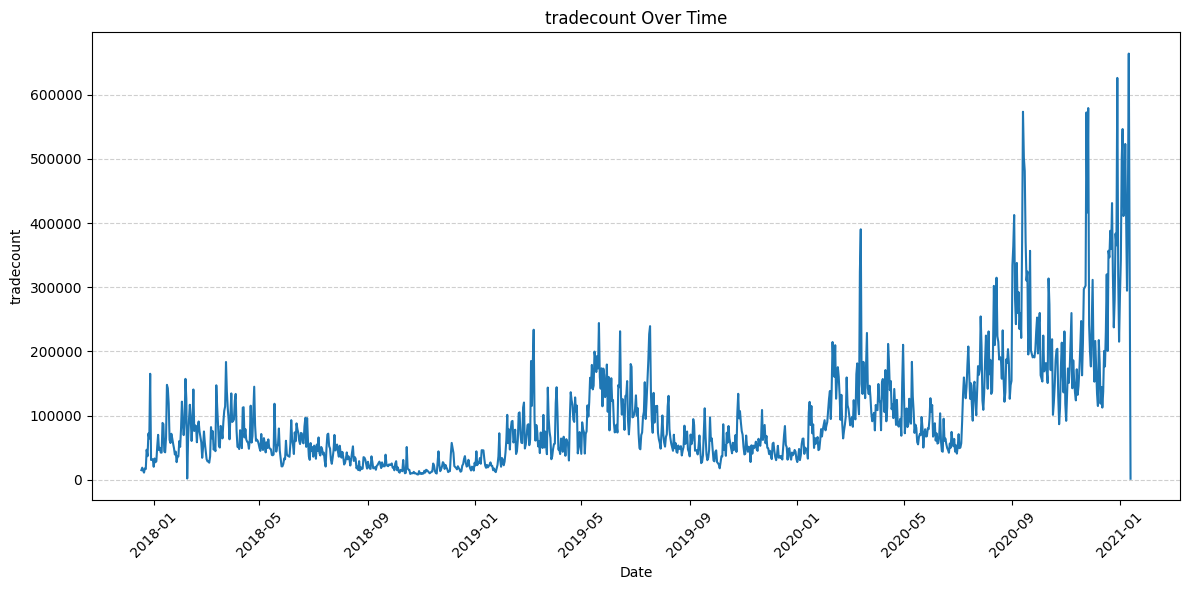

In [93]:
# Create the time series plot
plt.figure(figsize=(12, 6))
plt.plot(data[column_name])
plt.title(f'{column_name} Over Time')
plt.xlabel('Date')
plt.ylabel(column_name)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add gridlines
plt.tight_layout()
plt.show()


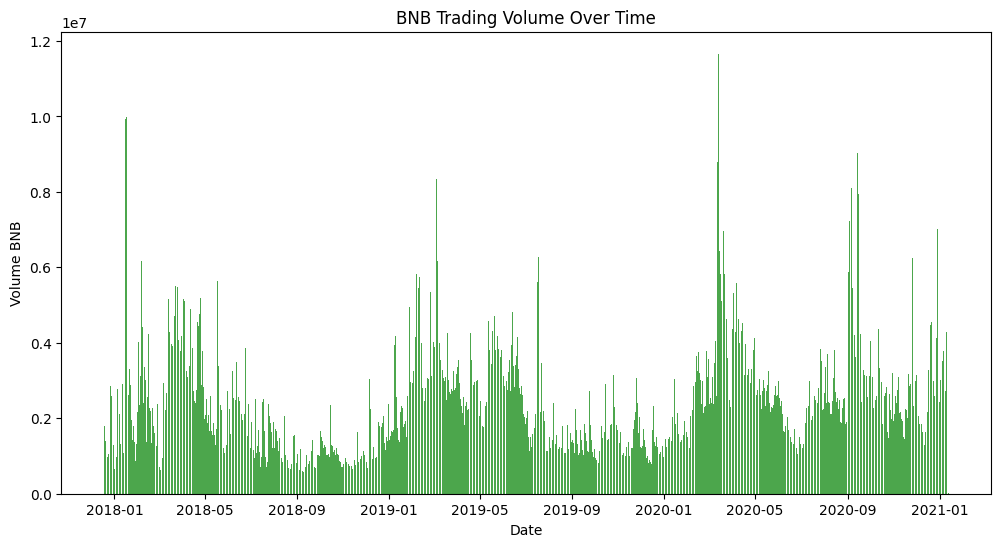

In [70]:
#Plot the trading volume over time.

plt.figure(figsize=(12, 6))
plt.bar(bnb_data.index, bnb_data['Volume BNB'], color='green', alpha=0.7, label='Trading Volume (BNB)')
plt.title('BNB Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume BNB')
plt.show()

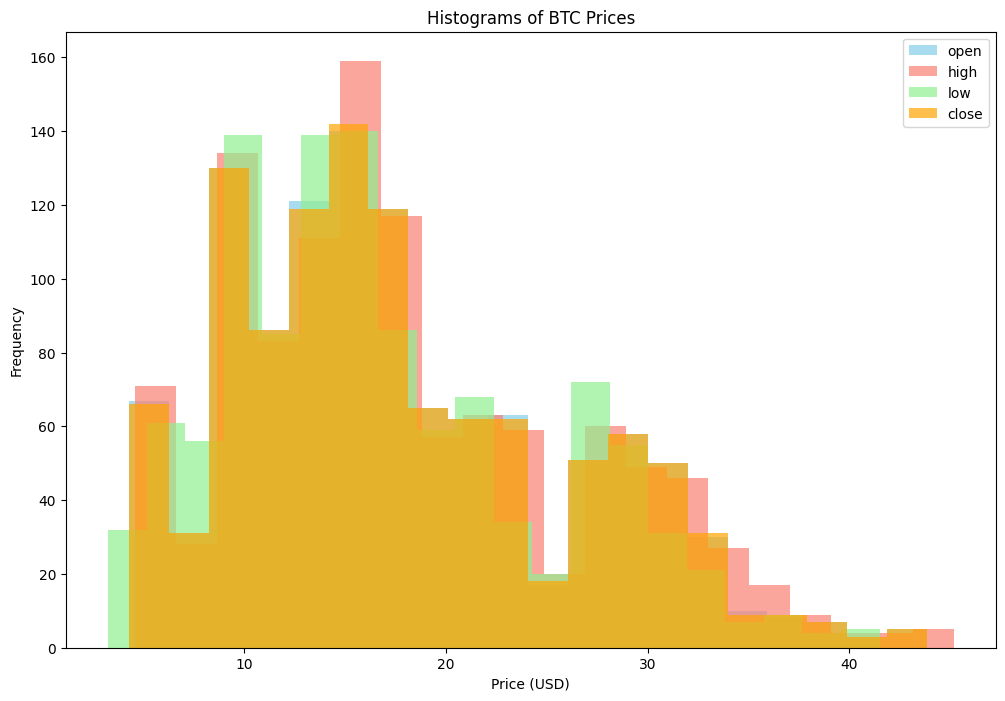

In [94]:
#Histograms
colors = ['skyblue', 'salmon', 'lightgreen', 'orange']
plt.figure(figsize=(12, 8))

for i, column in enumerate(['open', 'high', 'low', 'close']):
    plt.hist(bnb_data[column], bins=20, alpha=0.7, color=colors[i], label=column)

plt.title('Histograms of BTC Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [95]:
# Select only numeric columns for correlation matrix
num_col = bnb_data.select_dtypes(include=['float64']).columns
corr = bnb_data[num_col].corr()

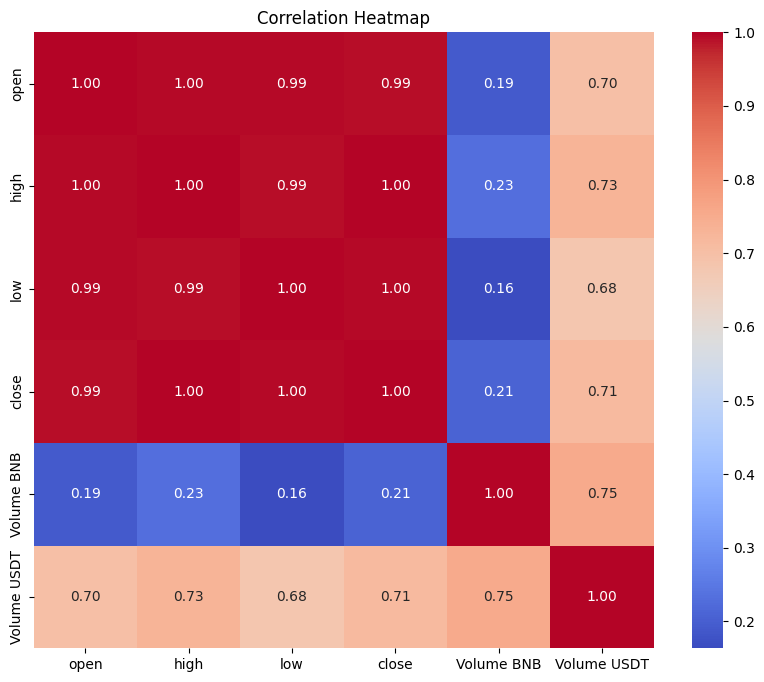

In [96]:
# Plot the correlation heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [97]:
# Feature scaling using Min-Max scaling
scaler = MinMaxScaler()

fs = ['open', 'high', 'low', 'close', 'Volume BNB', 'Volume USDT', 'tradecount']

# Apply Min-Max scaling to selected features
bnb_data[fs] = scaler.fit_transform(bnb_data[fs])

In [98]:
# Display the preprocessed data
print("Preprocessed Data:")
print(bnb_data.head())

Preprocessed Data:
            unix                 date    symbol      open      high       low  \
0  1610496000000  2021-01-13 00:00:00  BNB/USDT  0.858997  0.831368  0.904708   
1  1610409600000  2021-01-12 00:00:00  BNB/USDT  0.856267  0.877645  0.882353   
2  1610323200000  2021-01-11 00:00:00  BNB/USDT  0.963480  0.934605  0.831043   
3  1610236800000  2021-01-10 00:00:00  BNB/USDT  1.000000  1.000000  0.960784   
4  1610150400000  2021-01-09 00:00:00  BNB/USDT  0.962006  0.972714  1.000000   

      close  Volume BNB  Volume USDT  tradecount  
0  0.849199    0.000000     0.000000    0.000000  
1  0.858588    0.278903     0.387509    0.515199  
2  0.856396    0.542557     0.749322    1.000000  
3  0.963475    0.366127     0.570602    0.649267  
4  1.000000    0.232473     0.357830    0.442338  


In [99]:
gamma = 0.9 # Discount factor
alpha = 0.1 # Learning rate
epsilon = 0.1 # Exploration-exploitation trade-off

In [100]:
train_data, test_data = train_test_split(bnb_data, test_size=0.2, random_state=42)

In [101]:
# Initialize Q-table
num_states = 100
num_actions = 2

Q = np.zeros((num_states, num_actions))

In [104]:
def q_learning(Q, state, action, reward, next_state, learning_rate, discount_factor):
    # Update Q-value using Bellman equation
    Q[state, action] = Q[state, action] + learning_rate * (reward + discount_factor * max(Q[next_state, :]))
    return Q


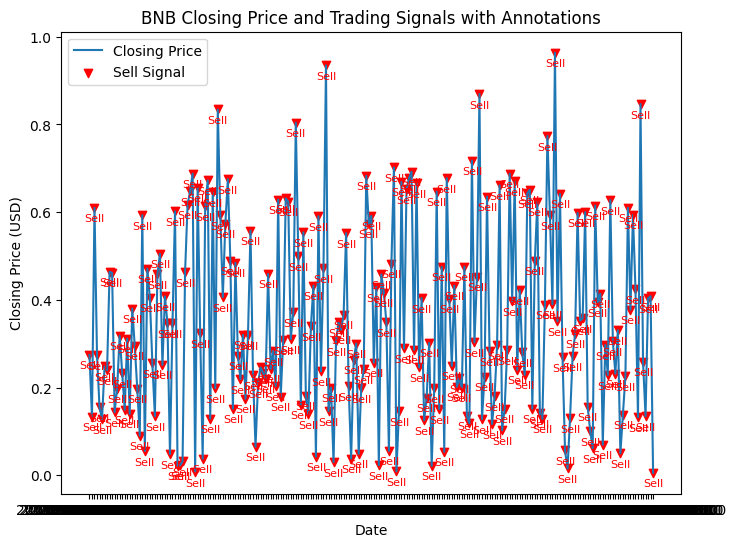

In [131]:
# Visualize actions taken during testing with annotations
plt.figure(figsize=(8, 6))
plt.plot(test_data['date'], test_data['close'], label='Closing Price')

# Periksa apakah actions_taken kosong atau memiliki panjang yang berbeda
if len(actions_taken) == 0:
    print("Peringatan: actions_taken kosong. Tidak ada sinyal yang akan ditampilkan.")
    actions_taken = np.zeros(len(test_data))  # Buat array kosong sepanjang test_data
elif len(test_data) != len(actions_taken):
    print("Peringatan: test_data dan actions_taken memiliki panjang yang berbeda")
    actions_taken = actions_taken[:len(test_data)]  # Potong actions_taken jika terlalu panjang

# Konversi actions_taken ke numpy array
actions_taken = np.array(actions_taken)

# Filter buy signals
buy_signals = test_data.loc[actions_taken == 1, 'date']
if len(buy_signals) > 0:
    plt.scatter(buy_signals, test_data.loc[test_data['date'].isin(buy_signals), 'close'],
                color='green', label='Buy Signal', marker='^')

    # Annotate Buy signals
    for date, price in zip(buy_signals, test_data.loc[test_data['date'].isin(buy_signals), 'close']):
        plt.annotate('Buy', (date, price), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, color='green')

# Filter sell signals
sell_signals = test_data.loc[actions_taken == 0, 'date']
if len(sell_signals) > 0:
    plt.scatter(sell_signals, test_data.loc[test_data['date'].isin(sell_signals), 'close'],
                color='red', label='Sell Signal', marker='v')

    # Annotate Sell signals
    for date, price in zip(sell_signals, test_data.loc[test_data['date'].isin(sell_signals), 'close']):
        plt.annotate('Sell', (date, price), textcoords="offset points", xytext=(0, -10), ha='center', fontsize=8, color='red')

plt.title('BNB Closing Price and Trading Signals with Annotations')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()